# Program Penelitian Model CNN untuk Klasifikasi Burung Merak Hijau

## Pra-Proses

### 1. Melakukan Frame Extraction dari Data Video

In [1]:
# BAGIAN IMPORT
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
import shutil

from PIL import Image
from torchvision import transforms

import random

In [2]:
# Fungsi untuk mendapatkan nama dari file
def get_nama_file(path_nama):
    path_nama_norm = os.path.normpath(path_nama)
    new = path_nama_norm.split("\\")
    nama_file, ekstensi = new[-1].split(".")
    if not nama_file:
        print("Gagal mengambil nama file..")
        return None
    # print("Berhasil mengambil nama file : "+nama_file)
    return nama_file, ekstensi

In [3]:
# Fungsi untuk mengkonversi video ke gambar setiap detik
def ekstrasi_frame_dari_video(path_sumber_video, path_hasil_ekstrasi):
    
    # Membuka video dengan cv2
    file_video = cv2.VideoCapture(path_sumber_video)

    # Memeriksa file video dapat dibuka atau tidak
    if not file_video.isOpened():
        print("Terjadi kesalahan! Tidak dapat membuka video. Periksa kembali video yang ingin dibuka")
        return None
    
    # Ambil nama video
    nama_video, ekstensi = get_nama_file(path_sumber_video)
    
    # Memeriksa folder untuk menempatkan hasil ekstrasi sudah ada
    if not os.path.exists(path_hasil_ekstrasi):
        os.makedirs(path_hasil_ekstrasi)

    frame_rate = int(file_video.get(5)) # Mendapatkan kecepatan bingkai (frame rate) video
    hitung_bingkai = 0

    while True:
        ret, bingkai = file_video.read()
        
        if not ret:
            break

        if hitung_bingkai % frame_rate == 0:
            # Simpan frame sebagai gambar bertipe jpg
            nama_bingkai = f"{path_hasil_ekstrasi}\{nama_video}_{hitung_bingkai // frame_rate}.jpg"
            cv2.imwrite(nama_bingkai, bingkai)
        
        hitung_bingkai += 1
    
    file_video.release()
    cv2.destroyAllWindows()

In [8]:
# Bagian Eksekusi frame extraction

# Merak Hijau
path_video_merakhijau = "D:\DATA RESEARCH S1\Dataset Primer\My Kamera 2\Merak Hijau"
path_hasil_ekstrasi_merakhijau = ".\hasil ekstrasi frame video\Merak Hijau"

# Kaua Raja
path_video_kauaraja = "D:\DATA RESEARCH S1\Dataset Primer\My Kamera 2\Kaua Raja"
path_hasil_ekstrasi_kauaraja = ".\hasil ekstrasi frame video\Kaua Raja"

## Sempidan Biru
path_video_sempidanbiru = "D:\DATA RESEARCH S1\Dataset Primer\My Kamera 2\Sempidan Biru"
path_hasil_ekstrasi_sempidanbiru = ".\hasil ekstrasi frame video\Sempidan Biru"

print("============ Memulai Proses Ekstrasi Video Merak Hijau =========== ")
for nama_video in os.listdir(path_video_merakhijau):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_video_merakhijau, nama_video)
        ekstrasi_frame_dari_video(lokasi_video_sumber, path_hasil_ekstrasi_merakhijau)
print("============ Selesai Ekstrasi Video Merak Hijau =========== ")

print("============ Memulai Proses Ekstrasi Video Kaua Raja =========== ")
for nama_video in os.listdir(path_video_kauaraja):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_video_kauaraja, nama_video)
        ekstrasi_frame_dari_video(lokasi_video_sumber, path_hasil_ekstrasi_kauaraja)
print("============ Selesai Ekstrasi Video Kaua Raja =========== ")

print("============ Memulai Proses Ekstrasi Video Sempidan Biru =========== ")
for nama_video in os.listdir(path_video_sempidanbiru):
    if nama_video.endswith(".mp4"):
        lokasi_video_sumber = os.path.join(path_video_sempidanbiru, nama_video)
        ekstrasi_frame_dari_video(lokasi_video_sumber, path_hasil_ekstrasi_sempidanbiru)
print("============ Selesai Ekstrasi Video Sempidan Biru =========== ")

============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131416
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131641
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131733
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131814
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil mengambil nama file : VID_20240202_131856
============ Selesai Ekstrasi Video Sempidan Biru =========== 
============ Memulai Proses Ekstrasi Video Sempidan Biru =========== 
Berhasil m

### 2. Seleksi data citra primer (Dilakukan Manual)

In [4]:
# Seleksi dilakukan secara manual.
# Memisahkan data yang menunjukan objek secara jelas dan data yang tidak menunjukan objek secara jelas

### 3. Penggabungan Data Primer & Sekunder

In [3]:
# DATA SEKUNDER

# Path Merak
merak_src_path_s = "D:\DATA RESEARCH S1\Dataset Sekunder\Ebird\Merak Hijau"
merak_dst_path = ".\join primer sekunder\Merak Hijau"

# Path Kaua Raja
kaua_src_path_s = "D:\DATA RESEARCH S1\Dataset Sekunder\Ebird\Kaua Raja"
kaua_dst_path = ".\join primer sekunder\Kaua Raja"

# Path Sempidan Biru
sempidan_src_path_s = "D:\DATA RESEARCH S1\Dataset Sekunder\Ebird\Sempidan Biru"
sempidan_dst_path = ".\join primer sekunder\Sempidan Biru"

# Merak
print("Memulai proses memulai pemindahan data sekunder burung merak..")
counter = 0
for nama_file in os.listdir(merak_src_path_s):
    counter+=1
    loc_file = os.path.join(merak_src_path_s, nama_file)
    name_new_file = f"S_{counter}.jpg"
    dst_file = os.path.join(merak_dst_path,name_new_file)
    if not os.path.exists(merak_dst_path):
        os.makedirs(merak_dst_path)
    shutil.copy(loc_file,dst_file)
print("Pemindahan data burung merak selesai !\n")

# Kaua
print("Memulai proses memulai pemindahan data sekunder burung kaua..")
counter = 0
for nama_file in os.listdir(kaua_src_path_s):
    counter+=1
    loc_file = os.path.join(kaua_src_path_s, nama_file)
    name_new_file = f"S_{counter}.jpg"
    dst_file = os.path.join(kaua_dst_path,name_new_file)
    if not os.path.exists(kaua_dst_path):
        os.makedirs(kaua_dst_path)
    shutil.copy(loc_file,dst_file)
print("Pemindahan data burung kaua selesai !\n")

# Sempidan
print("Memulai proses memulai pemindahan data sekunder burung sempidan..")
counter = 0
for nama_file in os.listdir(sempidan_src_path_s):
    counter+=1
    loc_file = os.path.join(sempidan_src_path_s, nama_file)
    name_new_file = f"S_{counter}.jpg"
    dst_file = os.path.join(sempidan_dst_path,name_new_file)
    if not os.path.exists(sempidan_dst_path):
        os.makedirs(sempidan_dst_path)
    shutil.copy(loc_file,dst_file)
print("Pemindahan data burung sempidan selesai !\n")

Memulai proses memulai pemindahan data sekunder burung merak..
Pemindahan data burung merak selesai !

Memulai proses memulai pemindahan data sekunder burung kaua..
Pemindahan data burung kaua selesai !

Memulai proses memulai pemindahan data sekunder burung sempidan..
Pemindahan data burung sempidan selesai !



In [33]:
# DATA PRIMER

# Path Merak
merak_src_path_p = ".\seleksi gambar dari ekstrasi frame\Merak Hijau"
merak_dst_path = ".\join primer sekunder\Merak Hijau"

# Path Kaua Raja
kaua_src_path_p = ".\seleksi gambar dari ekstrasi frame\Kaua Raja"
kaua_dst_path = ".\join primer sekunder\Kaua Raja"

# Path Sempidan Biru
sempidan_src_path_p = ".\seleksi gambar dari ekstrasi frame\Sempidan Biru"
sempidan_dst_path = ".\join primer sekunder\Sempidan Biru"

# Merak
print("Memulai proses memulai pemindahan data primer burung merak..")
counter = 0
for nama_file in os.listdir(merak_src_path_p):
    if nama_file.find("B") == -1:
        counter+=1
        loc_file = os.path.join(merak_src_path_p, nama_file)
        name_new_file = f"P_{counter}.jpg"
        dst_file = os.path.join(merak_dst_path,name_new_file)
        if not os.path.exists(merak_dst_path):
            os.makedirs(merak_dst_path)
        shutil.copy(loc_file,dst_file)
print("Pemindahan data burung merak selesai !")
print(f"Total data burung : {len(os.listdir(merak_dst_path))}\n")

# Kaua
print("Memulai proses memulai pemindahan data primer burung kaua..")
counter = 0
for nama_file in os.listdir(kaua_src_path_p):
    if nama_file.find("B") == -1:
        counter+=1
        loc_file = os.path.join(kaua_src_path_p, nama_file)
        name_new_file = f"P_{counter}.jpg"
        dst_file = os.path.join(kaua_dst_path,name_new_file)
        if not os.path.exists(kaua_dst_path):
            os.makedirs(kaua_dst_path)
        shutil.copy(loc_file,dst_file)
print("Pemindahan data burung kaua selesai !")
print(f"Total data burung : {len(os.listdir(kaua_dst_path))}\n")

# Sempidan
print("Memulai proses memulai pemindahan data primer burung sempidan..")
counter = 0
for nama_file in os.listdir(sempidan_src_path_p):
    if nama_file.find("B") == -1:
        counter+=1
        loc_file = os.path.join(sempidan_src_path_p, nama_file)
        name_new_file = f"P_{counter}.jpg"
        dst_file = os.path.join(sempidan_dst_path,name_new_file)
        if not os.path.exists(sempidan_dst_path):
            os.makedirs(sempidan_dst_path)
        shutil.copy(loc_file,dst_file)
print("Pemindahan data burung sempidan selesai !")
print(f"Total data burung : {len(os.listdir(sempidan_dst_path))}\n")

Memulai proses memulai pemindahan data primer burung merak..
Pemindahan data burung merak selesai !
Total data burung : 383

Memulai proses memulai pemindahan data primer burung kaua..
Pemindahan data burung kaua selesai !
Total data burung : 383

Memulai proses memulai pemindahan data primer burung sempidan..
Pemindahan data burung sempidan selesai !
Total data burung : 383



### 4. Proses denoising

In [4]:
# Fungsi untuk melakukan penghilangan derau dengan Median Filtering
def proses_denoise_median_filter(src_path, dst_path):
    
    # Load Image
    img = cv2.imread(src_path, 1)
    
    # menggunakan kernel 3x3 agar tidak terlalu blur hasilnya
    img_denoised = cv2.medianBlur(img, 3)

    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    name_img, ekstensi = get_nama_file(src_path)
    new_name_img = f"{name_img}-denoised.{ekstensi}"
    dst_full = os.path.join(dst_path, new_name_img)

    cv2.imwrite(dst_full, img_denoised)


In [50]:
# Main proses denoising
direktori_input_denoise = '.\join primer sekunder'
direktori_output = '.\denoised_image'

# Merak Hijau
input_denoise_merak = os.path.join(direktori_input_denoise, "Merak Hijau")
output_denoise_merak = os.path.join(direktori_output, "Merak Hijau")

# Kaua Raja
input_denoise_kaua = os.path.join(direktori_input_denoise, "Kaua Raja")
output_denoise_kaua = os.path.join(direktori_output, "Kaua Raja")

# Sempidan Biru
input_denoise_sempidan = os.path.join(direktori_input_denoise, "Sempidan Biru")
output_denoise_sempidan = os.path.join(direktori_output, "Sempidan Biru")

# Merak
print("Melakukan denoise citra burung merak, mohon tunggu..")
for nama_img in os.listdir(input_denoise_merak):
    gambar = os.path.join(input_denoise_merak,nama_img)
    proses_denoise_median_filter(gambar,output_denoise_merak)
print(f"Berhasil melakukan denoise {len(os.listdir(output_denoise_merak))} citra burung merak.")

# Kaua
print("Melakukan denoise citra burung kaua, mohon tunggu..")
for nama_img in os.listdir(input_denoise_kaua):
    gambar = os.path.join(input_denoise_kaua,nama_img)
    proses_denoise_median_filter(gambar,output_denoise_kaua)
print(f"Berhasil melakukan denoise {len(os.listdir(output_denoise_kaua))} citra burung kaua.")

# Sempidan
print("Melakukan denoise citra burung sempidan, mohon tunggu..")
for nama_img in os.listdir(input_denoise_sempidan):
    gambar = os.path.join(input_denoise_sempidan,nama_img)
    proses_denoise_median_filter(gambar,output_denoise_sempidan)
print(f"Berhasil melakukan denoise {len(os.listdir(output_denoise_sempidan))} citra burung sempidan.")

Melakukan denoise citra burung merak, mohon tunggu..
Berhasil melakukan denoise 383 citra burung merak.
Melakukan denoise citra burung kaua, mohon tunggu..
Berhasil melakukan denoise 383 citra burung kaua.
Melakukan denoise citra burung sempidan, mohon tunggu..
Berhasil melakukan denoise 383 citra burung sempidan.


### 5. Proses Sharpening Image

In [6]:
def proses_penajaman_citra(src_path, dst_path):
    # Buat Kernel
    kernel = np.array([[0,-1,0], [-1, 5, -1], [0, -1, 0]]) # Sumber kernel sharpen https://setosa.io/ev/image-kernels/ 

    # Load Image
    img = cv2.imread(src_path, 1)
    
    # menggunakan kernel 3x3 dengan nilai tertentu
    img_sharpened = cv2.filter2D(img,-1, kernel)

    if not os.path.exists(dst_path):
        os.makedirs(dst_path)

    name_img, ekstensi = get_nama_file(src_path)
    new_name_img = f"{name_img}-sharpened.{ekstensi}"
    dst_full = os.path.join(dst_path, new_name_img)

    cv2.imwrite(dst_full, img_sharpened)

In [55]:
# Main proses sharpening
direktori_input_denoise = '.\denoised_image'
direktori_output = '.\sharpened_image'

# Merak Hijau
input_denoise_merak = os.path.join(direktori_input_denoise, "Merak Hijau")
output_denoise_merak = os.path.join(direktori_output, "Merak Hijau")

# Kaua Raja
input_denoise_kaua = os.path.join(direktori_input_denoise, "Kaua Raja")
output_denoise_kaua = os.path.join(direktori_output, "Kaua Raja")

# Sempidan Biru
input_denoise_sempidan = os.path.join(direktori_input_denoise, "Sempidan Biru")
output_denoise_sempidan = os.path.join(direktori_output, "Sempidan Biru")

# Merak
print("Melakukan penjamanan citra burung merak, mohon tunggu..")
for nama_img in os.listdir(input_denoise_merak):
    gambar = os.path.join(input_denoise_merak,nama_img)
    proses_penajaman_citra(gambar,output_denoise_merak)
print(f"Berhasil melakukan penjamanan {len(os.listdir(output_denoise_merak))} citra burung merak.")

# Kaua
print("Melakukan penjamanan citra burung kaua, mohon tunggu..")
for nama_img in os.listdir(input_denoise_kaua):
    gambar = os.path.join(input_denoise_kaua,nama_img)
    proses_penajaman_citra(gambar,output_denoise_kaua)
print(f"Berhasil melakukan penjamanan {len(os.listdir(output_denoise_kaua))} citra burung kaua.")

# Sempidan
print("Melakukan penjamanan citra burung sempidan, mohon tunggu..")
for nama_img in os.listdir(input_denoise_sempidan):
    gambar = os.path.join(input_denoise_sempidan,nama_img)
    proses_penajaman_citra(gambar,output_denoise_sempidan)
print(f"Berhasil melakukan penjamanan {len(os.listdir(output_denoise_sempidan))} citra burung sempidan.")

Melakukan penjamanan citra burung merak, mohon tunggu..
Berhasil melakukan penjamanan 383 citra burung merak.
Melakukan penjamanan citra burung kaua, mohon tunggu..
Berhasil melakukan penjamanan 383 citra burung kaua.
Melakukan penjamanan citra burung sempidan, mohon tunggu..
Berhasil melakukan penjamanan 383 citra burung sempidan.


### 6. Proses Contrast Stretching

In [5]:
# Fungsi untuk menampilkan histogram dari sebuah gambar
def show_histogram_img(data_img):

    img_b = data_img[:,:,0]
    img_g = data_img[:,:,1]
    img_r = data_img[:,:,2]

    # fig, ax = plt.subplots(3, 1)
    # fig.tight_layout(h_pad=2)
    # ax[0].hist(histB.flatten(), 256, [0,256], color ='b')
    # ax[0].title.set_text("Histogram Channel Blue")
    # ax[1].hist(histG.flatten(), 256, [0,256], color ='g')
    # ax[1].title.set_text("Histogram Channel Green")
    # ax[2].hist(histR.flatten(), 256, [0,256], color ='r')
    # ax[2].title.set_text("Histogram Channel Red")
    # # plt.title("Image Histogram")
    hist_b = cv2.calcHist(img_b, [0], None, [256], [0, 256])
    hist_g = cv2.calcHist(img_g, [0], None, [256], [0, 256])
    hist_r = cv2.calcHist(img_r, [0], None, [256], [0, 256])

    plt.subplot(231)
    plt.imshow(255-img_b, cmap='Blues') # pengurangan/invers ini dilakukan karena cmap matplotlib
    plt.title("Channel Blue")

    plt.subplot(232)
    plt.imshow(255-img_g, cmap='Greens') # pengurangan/invers ini dilakukan karena cmap matplotlib
    plt.title("Channel Green")

    plt.subplot(233)
    plt.imshow(255-img_r, cmap='Reds') # pengurangan/invers ini dilakukan karena cmap matplotlib
    plt.title("Channel Red")

    plt.subplot(234)
    plt.bar(range(256), hist_b.flatten(), color='b')
    plt.xlabel("Intensitas piksel")
    plt.ylabel("Jumlah piksel")
    plt.title("Hist. Channel Blue")

    plt.subplot(235)
    plt.bar(range(256), hist_g.flatten(), color='g')
    plt.xlabel("Intensitas piksel")
    plt.ylabel("Jumlah piksel")
    plt.title("Hist. Channel Green")

    plt.subplot(236)
    plt.bar(range(256), hist_r.flatten(), color='r')
    plt.xlabel("Intensitas piksel")
    plt.ylabel("Jumlah piksel")
    plt.title("Hist. Channel Red")

    plt.tight_layout()
    plt.show()

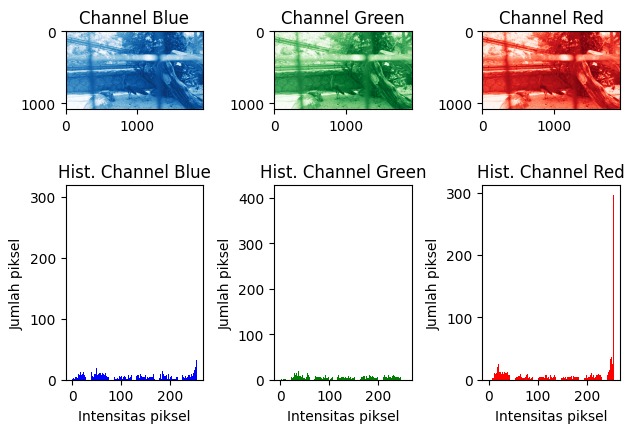

In [20]:
gmbr = cv2.imread("VID_20240202_105421_19.jpg", 1)
show_histogram_img(gmbr)

In [26]:
# Fungsi-1 untuk Contras Stretching untuk image berwarna
def proses_contrast_stretching(img):

    grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #membuat img menjadi array berdimensi 1 
    hist,bins = np.histogram(grey.flatten(),256,[0,256]) 
    #nilai setiap hist diakumulasikan 
    cdf = hist.cumsum() 
    #membuat masking img  
    cdf_m = np.ma.masked_equal(cdf,0) 
    #melakukan kontras stretching pada citra
    cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    #merubah cdf menjadi variable image "bertipe uint8" 
    cdf = np.ma.filled(cdf_m,0).astype('uint8') 
    #hasil citra setelah contras stretching
    img2 = cdf[img]

    return img2

In [9]:
# Fungsi-2 untuk Contras Stretching untuk image berwarna
def proses_contrast_stretching2(img, dst_path):
    # load gambar
    img_ini = cv2.imread(img,1)

    img_b, img_g, img_r = cv2.split(img_ini)

    # parameter
    a = 0           # nilai min
    b = 255         # nilai max
    c_blue = np.min(img_b)
    d_blue = np.max(img_b)
    c_green = np.min(img_g)
    d_green = np.max(img_g)
    c_red = np.min(img_r)
    d_red = np.max(img_r)

    # ukuran img
    row, col, chnl = img_ini.shape
    # dummy citra
    new_img_b = np.zeros([row,col], dtype="uint8")
    new_img_g= np.zeros([row,col], dtype="uint8")
    new_img_r= np.zeros([row,col], dtype="uint8")

    # ============== Proses channel blue, green, red
    # rumus berdasarkan metode Automatic Contrast Adjustment (Burger, 2016)
    for i in range(row):
        for j in range(col):
            new_img_b[i,j] = ((img_b[i,j] - c_blue) * (b - a) / (d_blue - c_blue)) + a
            new_img_g[i,j] = ((img_g[i,j] - c_green) * (b - a) / (d_green - c_green)) + a
            new_img_r[i,j] = ((img_r[i,j] - c_red) * (b - a) / (d_red - c_red)) + a

    result_blue = new_img_b.astype("uint8")
    result_green = new_img_g.astype("uint8")
    result_red = new_img_r.astype("uint8")
            
    result_img = cv2.merge([result_blue, result_green, result_red])
    
    if not os.path.exists(dst_path):
        os.makedirs(dst_path)
    
    nama_gambar, ekstensi = get_nama_file(img)
    nama_gambar_baru = f"{nama_gambar}_constretch.{ekstensi}"
    dst_full = os.path.join(dst_path, nama_gambar_baru)
    
    cv2.imwrite(dst_full,result_img)
    print(f"Menyimpan Gambar berhasil {nama_gambar_baru}..")

In [16]:
# Main proses contrast stretching
direktori_input_denoise = '.\sharpened_image'
direktori_output = '.\contrasted_image'

# Merak Hijau
input_denoise_merak = os.path.join(direktori_input_denoise, "Merak Hijau")
output_denoise_merak = os.path.join(direktori_output, "Merak Hijau")

# Kaua Raja
input_denoise_kaua = os.path.join(direktori_input_denoise, "Kaua Raja")
output_denoise_kaua = os.path.join(direktori_output, "Kaua Raja")

# Sempidan Biru
input_denoise_sempidan = os.path.join(direktori_input_denoise, "Sempidan Biru")
output_denoise_sempidan = os.path.join(direktori_output, "Sempidan Biru")

# Merak
print("Melakukan penarikan kontras citra burung merak, mohon tunggu..")
for nama_img in os.listdir(input_denoise_merak):
    gambar = os.path.join(input_denoise_merak,nama_img)
    proses_contrast_stretching2(gambar, output_denoise_merak)
print(f"Berhasil melakukan penarikan kontras {len(os.listdir(output_denoise_merak))} citra burung merak.")

# Kaua
print("Melakukan penarikan kontras citra burung kaua, mohon tunggu..")
for nama_img in os.listdir(input_denoise_kaua):
    gambar = os.path.join(input_denoise_kaua,nama_img)
    proses_contrast_stretching2(gambar,output_denoise_kaua)
print(f"Berhasil melakukan penarikan kontras {len(os.listdir(output_denoise_kaua))} citra burung kaua.")

# Sempidan
print("Melakukan penarikan kontras citra burung sempidan, mohon tunggu..")
for nama_img in os.listdir(input_denoise_sempidan):
    gambar = os.path.join(input_denoise_sempidan,nama_img)
    proses_contrast_stretching2(gambar,output_denoise_sempidan)
print(f"Berhasil melakukan penarikan kontras {len(os.listdir(output_denoise_sempidan))} citra burung sempidan.")

Melakukan penarikan kontras citra burung merak, mohon tunggu..
Menyimpan Gambar berhasil P_1-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_10-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_100-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_101-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_102-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_103-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_104-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_105-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_106-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_107-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_108-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_109-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_11-denoised-sharpened_constretch.jpg..
Menyimpan Gambar berhasil P_110-denoised-sharpened_constr

### 7. Proses Croping (Manual)

### 8. Proses Resize Image (224x224)

In [19]:
# Fungsi proses resize gambar menjadi 224x224
def proses_resize_img(path_citra, ukuran, path_output):
    
    try:
        citra = cv2.imread(path_citra, 1)

        hasil_resize = cv2.resize(citra, ukuran, interpolation=cv2.INTER_AREA)

        if not os.path.exists(path_output):
            os.makedirs(path_output)

        nama_gambar, ekstensi = get_nama_file(path_citra)
        nama_gambar_baru = f"{nama_gambar}_resize.{ekstensi}"
        dst_full = os.path.join(path_output, nama_gambar_baru)

        cv2.imwrite(dst_full, hasil_resize)
    except:
        print("Gagal melakukan resize, periksa kembali citra, ukuran, dan direktori")

In [20]:
# Main proses resize image
direktori_input_denoise = '.\crop image'
direktori_output = '.\\resize_image\\'
ukuran_resize = (224, 224)

jenis_burung = ["Merak Hijau", "Kaua Raja", "Sempidan Biru"]

for burung in jenis_burung:
    input_resize = os.path.join(direktori_input_denoise, burung)
    output_resize = os.path.join(direktori_output, burung)
    print(f"Melakukan resize citra burung {burung}, mohon tunggu..")
    for nama_img in os.listdir(input_resize):
        gambar = os.path.join(input_resize,nama_img)
        proses_resize_img(gambar, ukuran_resize, output_resize)
    print(f"Berhasil melakukan resize {len(os.listdir(output_resize))} citra burung {burung}.")

Melakukan resize citra burung Merak Hijau, mohon tunggu..
Berhasil melakukan resize 383 citra burung Merak Hijau.
Melakukan resize citra burung Kaua Raja, mohon tunggu..
Berhasil melakukan resize 383 citra burung Kaua Raja.
Melakukan resize citra burung Sempidan Biru, mohon tunggu..
Berhasil melakukan resize 383 citra burung Sempidan Biru.


### Alur sebelumnya : Augmentasi -> Gabungin data -> Split train test
### Alur Sekarang : Split train test -> Augmentasi -> gabung datanya

# Pemisahan Data Training dan Testing

In [5]:
# Fungsi proses spliting dengan cara mengambil secara random
def proses_spliting(path_img, dst_path, p_train):
    # Lakukan pengecekan path destinasi untuk di delete kalau ada. (agar setiap dijalankan memberikan hasil yang berbeda)
    if os.path.exists(dst_path):
        shutil.rmtree(dst_path)
    
    folder_train = os.path.join(dst_path, "train")
    folder_test = os.path.join(dst_path, "test")
    
    os.makedirs(folder_train)
    os.makedirs(folder_test)

    jenis_burung = os.listdir(path_img)

    for burung in jenis_burung:
        path_burung = os.path.join(path_img, burung)
        list_gambar = os.listdir(path_burung)
        total_gambar = len(list_gambar)
        num_train_selected = round( total_gambar * p_train)
        num_test_selected = total_gambar - num_train_selected
        
        if not os.path.exists(os.path.join(folder_train, burung)):
                os.makedirs(os.path.join(folder_train, burung))
        if not os.path.exists(os.path.join(folder_test, burung)):
                os.makedirs(os.path.join(folder_test, burung))

        hitung = 0
        while(len(list_gambar) != num_test_selected):
            selected_item = random.choice(list_gambar)
            list_gambar.remove(selected_item)

            hitung +=1
            loc_asal = os.path.join(path_burung, selected_item)
            nama_baru = str(hitung)+".jpg"
            loc_copy = os.path.join(folder_train, burung, nama_baru)

            shutil.copy(loc_asal, loc_copy)
        
        hitung = 0
        for i in list_gambar:
            hitung +=1
            loc_asal = os.path.join(path_burung, i)
            nama_baru = str(hitung)+".jpg"
            loc_copy = os.path.join(folder_test, burung, nama_baru)
            shutil.copy(loc_asal, loc_copy)

In [6]:
# Komposisi pemisahan data berdasarkan penelitian sebelumnya banyak yang menggunakan proporsi 80% training dan 20% testing.
path_src = ".\\resize_image"
split_data = ".\\split_data_2"

persen_of_train = 0.8
persen_of_test = 0.2

proses_spliting(path_src, split_data, persen_of_train)

## Augmentasi Data

In [7]:
# Fungsi Augmentasi 
# Kita akan menggunakan library torchvision.transform dan PIL.Image
def proses_augmentasi(path_img, dst_path):
    try:
        img_awal = Image.open(path_img)

        # Lakukan flip, parameter 1 untuk memberikan sebuah propbabilitas pasti diflip. 
        h_flip = transforms.RandomHorizontalFlip(1)
        h_flip_img = h_flip(img_awal)

        # Lakukan random rotasi 0 - 15 derajat dari pusatnya (0,0)
        do_rotate = transforms.RandomRotation(15)
        rotate_img = do_rotate(h_flip_img)
        
        # Lakukan pengecekan path destinasi
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)

        # Penamaan citra baru
        name_img, ekstensi = get_nama_file(path_img)
        # name_img = name_img.replace("crop_resize", "")
        new_name_img = f"{name_img}-aug.{ekstensi}"
        dst_full = os.path.join(dst_path, new_name_img)

        # Save image
        rotate_img.save(dst_full)
    
    except Exception as e:
        print(f"""Proses augmentasi gagal, error : {e}""")

In [8]:
# Main proses augmentasi
direktori_input = '.\\split_data_2\\'
direktori_output = '.\\augmentasi_image_2\\'

tipe_data = ["train", "test"]
jenis_burung = ["Merak Hijau", "Kaua Raja", "Sempidan Biru"]

for tipe in tipe_data:
    for burung in jenis_burung:
        input_aug = os.path.join(direktori_input, tipe, burung)
        print(input_aug)
        output_aug = os.path.join(direktori_output, tipe, burung)
        print(output_aug)
        print(f"Melakukan augmentasi citra burung {burung}, mohon tunggu..")
        for nama_img in os.listdir(input_aug):
            gambar = os.path.join(input_aug, nama_img)
            print(gambar)
            proses_augmentasi(gambar, output_aug)
        print(f"Berhasil melakukan augmentasi {len(os.listdir(output_aug))} citra burung {burung}.")

.\split_data_2\train\Merak Hijau
.\augmentasi_image_2\train\Merak Hijau
Melakukan augmentasi citra burung Merak Hijau, mohon tunggu..
.\split_data_2\train\Merak Hijau\1.jpg
.\split_data_2\train\Merak Hijau\10.jpg
.\split_data_2\train\Merak Hijau\100.jpg
.\split_data_2\train\Merak Hijau\101.jpg
.\split_data_2\train\Merak Hijau\102.jpg
.\split_data_2\train\Merak Hijau\103.jpg
.\split_data_2\train\Merak Hijau\104.jpg
.\split_data_2\train\Merak Hijau\105.jpg
.\split_data_2\train\Merak Hijau\106.jpg
.\split_data_2\train\Merak Hijau\107.jpg
.\split_data_2\train\Merak Hijau\108.jpg
.\split_data_2\train\Merak Hijau\109.jpg
.\split_data_2\train\Merak Hijau\11.jpg
.\split_data_2\train\Merak Hijau\110.jpg
.\split_data_2\train\Merak Hijau\111.jpg
.\split_data_2\train\Merak Hijau\112.jpg
.\split_data_2\train\Merak Hijau\113.jpg
.\split_data_2\train\Merak Hijau\114.jpg
.\split_data_2\train\Merak Hijau\115.jpg
.\split_data_2\train\Merak Hijau\116.jpg
.\split_data_2\train\Merak Hijau\117.jpg
.\split_d

## Menggabungkan Data Aug + Data Ori

In [35]:
# Mengabil gambar dan menggabungkannya lalu direname
gambar_asal = [".\\split_data_2", ".\\augmentasi_image_2"]
path_join_citra_resize_aug = ".\\clean_data_2"
list_path_tujuan = []

try:
    counter = 0
    print("Memulai proses copy dan penggabungan data citra..")
    for dir_input in gambar_asal:
        list_train_test = os.listdir(dir_input)
        for train_test in list_train_test:
            path_jenis_burung = os.path.join(dir_input, train_test)
            jenis_burung = os.listdir(path_jenis_burung)
            for burung in jenis_burung:
                path_burung = os.path.join(dir_input, train_test, burung)
                path_folder_tujuan = os.path.join(path_join_citra_resize_aug, train_test, burung)
                # Simpan semua path tujuan
                if path_folder_tujuan not in list_path_tujuan:
                    list_path_tujuan.append(path_folder_tujuan)
                # Lakukan pengecekan path destinasi
                if not os.path.exists(path_folder_tujuan):
                    os.makedirs(path_folder_tujuan)
                for nama_citra in os.listdir(path_burung):
                    counter += 1
                    path_citra = os.path.join(path_burung, nama_citra)
                    path_citra_tujuan = os.path.join(path_folder_tujuan, nama_citra)
                    shutil.copy(path_citra, path_citra_tujuan)               
    print("Proses copy dan penggabungan data selesai!")
    print(f"Total data yang berhasil digabungkan : {counter} citra")
except Exception as e:
    print("Gagal melakukan copy dan penggabungan data!")
    print(f"""Error message : {e}""")

print("")
print("Proses rename citra pada folder final_clean_data dimulai..")
for folder in list_path_tujuan:
    counter = 0
    path_final_data = folder.replace("clean_data_2", "final_clean_data")
    for citra in os.listdir(folder):
        counter += 1
        new_rename = f"{counter}.jpg"
        # Lakukan pengecekan path destinasi
        if not os.path.exists(path_final_data):
            os.makedirs(path_final_data)
        path_citra_yang_direname = os.path.join(folder, citra)
        path_citra_new_rename = os.path.join(path_final_data, new_rename)
        os.rename(path_citra_yang_direname, path_citra_new_rename)
print("Proses rename citra selesai!")

Memulai proses copy dan penggabungan data citra..
Proses copy dan penggabungan data selesai!
Total data yang berhasil digabungkan : 2298 citra

Proses rename citra pada folder final_clean_data dimulai..
Proses rename citra selesai!


# Pembuatan Model

## Cara 1

In [2]:
# import module untuk kebutuhan model
import numpy as np
from sklearn.datasets import load_files

import tensorflow as tf
from tensorflow import keras

import matplotlib.cm as cm

from tensorflow.keras.utils import img_to_array

from keras.utils import to_categorical
from keras.models import Model
from keras import optimizers
from tensorflow.keras.optimizers import SGD, Adam, Optimizer

from keras import applications
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.preprocessing import image

from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import KFold, train_test_split

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

from keras.models import load_model

In [2]:
import numpy as np

data_train_dir = ".\\final_clean_data\\train"
data_test_dir = ".\\final_clean_data\\test"

data_train = load_files(data_train_dir)
x_training = np.array(data_train['filenames'])
y_training = np.array(data_train['target'])

data_test = load_files(data_test_dir)
x_testing = np.array(data_test['filenames'])
y_testing = np.array(data_test['target'])

# Penampilan dari array
print("Contoh data Files - ", x_training)
print("Target Labels - ", y_training)
print()

print("DATA TRAIN")
print("Number of files : ", x_training.shape[0])
print("Number of targets : ", y_training.shape[0])
print()

print("DATA TEST")
print("Number of files : ", x_testing.shape[0])
print("Number of targets : ", y_testing.shape[0])
print()


print("[INFO LABELS]")
print("Kaua Raja = 0")
print("Merak Hijau = 1")
print("Sempidan Biru = 2")

Contoh data Files -  ['.\\final_clean_data\\train\\Kaua Raja\\56.jpg'
 '.\\final_clean_data\\train\\Kaua Raja\\147.jpg'
 '.\\final_clean_data\\train\\Kaua Raja\\30.jpg' ...
 '.\\final_clean_data\\train\\Sempidan Biru\\486.jpg'
 '.\\final_clean_data\\train\\Kaua Raja\\602.jpg'
 '.\\final_clean_data\\train\\Merak Hijau\\164.jpg']
Target Labels -  [0 0 0 ... 2 0 1]

DATA TRAIN
Number of files :  1836
Number of targets :  1836

DATA TEST
Number of files :  462
Number of targets :  462

[INFO LABELS]
Kaua Raja = 0
Merak Hijau = 1
Sempidan Biru = 2


In [3]:
def konversi_citra_menjadi_array(list_of_filepath):
    arr_img = []
    for filepath in list_of_filepath:
        img = load_img(filepath)
        img = img_to_array(img)
        arr_img.append(img)
    return arr_img

x_training = np.array(konversi_citra_menjadi_array(x_training))
x_testing = np.array(konversi_citra_menjadi_array(x_testing))
print(x_training.shape)
print(x_testing.shape)
# print('Data citra pertama yg akan ditraining : ', x_training[0])
# print('Data citra pertama yg akan ditest : ', x_testing[0])

(1836, 224, 224, 3)
(462, 224, 224, 3)


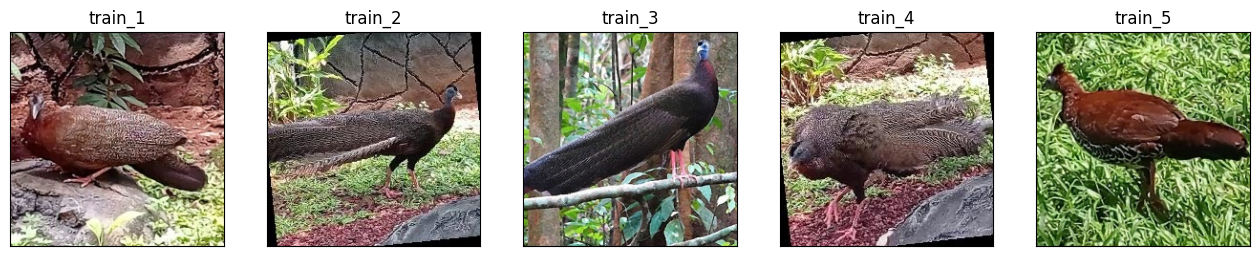

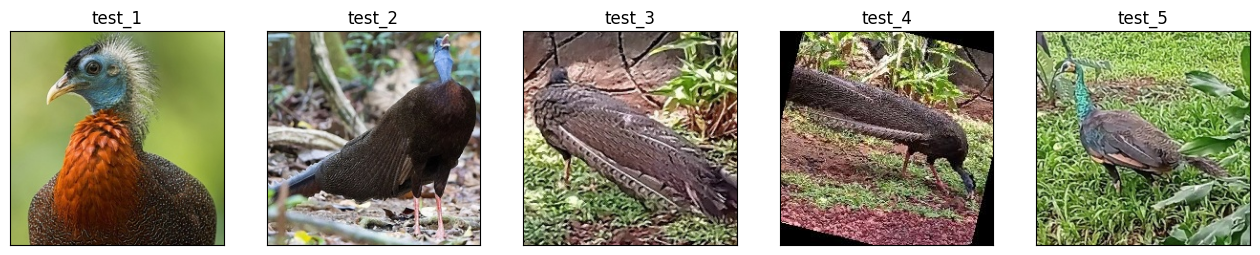

In [4]:
import matplotlib.pyplot as plt

# Melihat Sample gambar
fig = plt.figure(figsize=(16,9))
fig2 = plt.figure(figsize=(16,9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.set_title(f'train_{i+1}')
    ax.imshow((x_training[i].astype(np.uint8)))
    ax2 = fig2.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax2.set_title(f'test_{i+1}')
    ax2.imshow((x_testing[i].astype(np.uint8)))

In [5]:
# Count number of class & Change Label to one-hot encoding
# Let's confirm the number of classes
no_of_classes_train = len(np.unique(y_training))
print(f"Number of class train : {no_of_classes_train}")


y_training_categ = np.array(to_categorical(y_training, no_of_classes_train))

no_of_classes_test = len(np.unique(y_testing))
print(f"Number of class test : {no_of_classes_test}")


y_testing_categ = np.array(to_categorical(y_testing, no_of_classes_test))

Number of class train : 3
Number of class test : 3


In [6]:
print(y_training[0])
print(y_training_categ[0])
print(type(y_training_categ[0]))

0
[1. 0. 0.]
<class 'numpy.ndarray'>


In [7]:
# Split dataset to train and  test
x_train, x_valid, y_train, y_valid = train_test_split(x_training, y_training_categ, test_size = 0.2, random_state = 43)

In [8]:
total_x = x_training.shape[0] + x_testing.shape[0]
print('x : ', total_x)
print()

print('Jumlah data x_train = ', x_train.shape[0])
print('Jumlah data x_valid = ', x_valid.shape[0])
print('Jumlah data x_test = ', x_testing.shape[0])
print()

total_y = y_training.shape[0] + y_testing.shape[0]
print('y : ', total_y)
print()
print('Jumlah data y_train = ', y_train.shape[0])
print('Jumlah data y_valid = ', y_valid.shape[0])
print('Jumlah data y_test = ', y_testing.shape[0])


x :  2298

Jumlah data x_train =  1468
Jumlah data x_valid =  368
Jumlah data x_test =  462

y :  2298

Jumlah data y_train =  1468
Jumlah data y_valid =  368
Jumlah data y_test =  462


In [9]:
# Load Model
from keras.models import Model
from keras import optimizers
from keras import applications
from keras.preprocessing.image import ImageDataGenerator

from keras.layers import GlobalAveragePooling2D, Dense, Flatten, Dropout
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint

# load vgg16 model without final layers(include_top=False)
base_model_vgg16 = applications.VGG16(weights='imagenet', include_top=True)
print("Telah memuat model!")

# membekukan 19 lapisan pertama dari model tersebut. Ini berarti lapisan-lapisan tersebut tidak akan diperbarui selama pelatihan ulang (fine-tuning)
for layer in base_model_vgg16.layers[:19]:
    layer.trainable = False

base_model_vgg16.summary()


Telah memuat model!
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 5

In [10]:
# Melihat Layer dari VGG16
for (i, layer) in enumerate(base_model_vgg16.layers):
    print(f"Layer {i+1} : {layer.__class__.__name__}, Trainabel : {layer.trainable} ")

Layer 1 : InputLayer, Trainabel : False 
Layer 2 : Conv2D, Trainabel : False 
Layer 3 : Conv2D, Trainabel : False 
Layer 4 : MaxPooling2D, Trainabel : False 
Layer 5 : Conv2D, Trainabel : False 
Layer 6 : Conv2D, Trainabel : False 
Layer 7 : MaxPooling2D, Trainabel : False 
Layer 8 : Conv2D, Trainabel : False 
Layer 9 : Conv2D, Trainabel : False 
Layer 10 : Conv2D, Trainabel : False 
Layer 11 : MaxPooling2D, Trainabel : False 
Layer 12 : Conv2D, Trainabel : False 
Layer 13 : Conv2D, Trainabel : False 
Layer 14 : Conv2D, Trainabel : False 
Layer 15 : MaxPooling2D, Trainabel : False 
Layer 16 : Conv2D, Trainabel : False 
Layer 17 : Conv2D, Trainabel : False 
Layer 18 : Conv2D, Trainabel : False 
Layer 19 : MaxPooling2D, Trainabel : False 
Layer 20 : Flatten, Trainabel : True 
Layer 21 : Dense, Trainabel : True 
Layer 22 : Dense, Trainabel : True 
Layer 23 : Dense, Trainabel : True 


In [11]:
# Classification Section Architect VGG16 3 Class

# Mengambil output dari layer sebelumnya (sebelum Dense terakhir)
output_layer_22_vgg16 = base_model_vgg16.layers[-2].output

# Menambahkan layer Dense baru dengan 3 output (sesuai dengan jumlah kelas Anda)
predictions_layer_3_kelas = Dense(3, activation='softmax')(output_layer_22_vgg16)

# Membuat model baru dengan perubahan yang dilakukan
VGG16_model_3kelas = Model(inputs=base_model_vgg16.input, outputs=predictions_layer_3_kelas)

In [12]:
VGG16_model_3kelas.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
# Sesuaikan optimasi yang mau digunakan, loss menggunakan categorycal_crossentropy karena kelas yang dipelajari 3 
VGG16_model_3kelas.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

#### Model dibuat 4 kali, dengan masing-masing hyperparameter 25, 50, 100, 200

In [14]:
# [Train Process] time to train model
from keras.callbacks import ModelCheckpoint, EarlyStopping

epochs = 20
btchSize = 200
model_save_path = ".\\trained_model\model8.hdf5"

train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train, batch_size = btchSize)

validation_generator = valid_datagen.flow(
    x_valid, y_valid, batch_size = btchSize)

checkpointer = ModelCheckpoint(model_save_path, monitor = "val_accuracy", save_best_only = True, verbose = 1)
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, mode='max', min_delta=0.01)

history = VGG16_model_3kelas.fit(
    train_generator,
    steps_per_epoch = len(x_train) // btchSize,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = len(x_valid) // btchSize,
    callbacks = [checkpointer, early_stopping])

np.save('.\\trained_model\historymodel8_save.npy', history.history)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 46.9421 - accuracy: 0.3951  
Epoch 1: val_accuracy improved from -inf to 0.62000, saving model to .\trained_model\model8.hdf5


c:\Python\Python3.11.6\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


7/7 [==============================] - 1037s 149s/step - loss: 46.9421 - accuracy: 0.3951 - val_loss: 3.6176 - val_accuracy: 0.6200
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 4.5952 - accuracy: 0.5363  
Epoch 2: val_accuracy improved from 0.62000 to 0.88500, saving model to .\trained_model\model8.hdf5
7/7 [==============================] - 1017s 147s/step - loss: 4.5952 - accuracy: 0.5363 - val_loss: 0.8094 - val_accuracy: 0.8850
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.4681 - accuracy: 0.9293  
Epoch 3: val_accuracy improved from 0.88500 to 0.97000, saving model to .\trained_model\model8.hdf5
7/7 [==============================] - 1104s 161s/step - loss: 0.4681 - accuracy: 0.9293 - val_loss: 0.7425 - val_accuracy: 0.9700
Epoch 4/20
7/7 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9800  
Epoch 4: val_accuracy improved from 0.97000 to 0.97500, saving model to .\trained_model\model8.hdf5
7/7 [===================

In [9]:
# Line Chart Perkembangan Akurasi & Loss Training Model

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

TypeError: 'NoneType' object is not subscriptable

In [14]:
# Load model

# muat model agar dapat ditest
mymodel_path = '.\\trained_model\\model8\\model8.hdf5'
mymodelhistory_path = '.\\trained_model\\model8\\historymodel8_save.npy'

mymodel = load_model(mymodel_path)
history = np.load(mymodelhistory_path, allow_pickle = 'TRUE').item()

In [18]:

min_loss_value = min(history['loss'])
index = history['loss'].index(min_loss_value)
akurasi = history['accuracy'][index]
print('best loss training :' + str(min_loss_value))
print('index :' + str(index))
print('accuracy training :'+ str(akurasi))
print('best accuracy training:' + str(max(history['accuracy'])))
print('')
min_loss_value = min(history['val_loss'])
index = history['val_loss'].index(min_loss_value)
akurasi = history['val_accuracy'][index]
print('best loss val :' + str(min_loss_value))
print('index :' + str(index))
print('accuracy val :'+ str(akurasi))
print('best accuracy val:' + str(max(history['val_accuracy'])))

best loss training :0.006405561696738005
index :6
accuracy training :0.9960567951202393
best accuracy training:0.9968454241752625

best loss val :0.11521278321743011
index :3
accuracy val :0.9750000238418579
best accuracy val:0.9750000238418579


In [15]:
print("=========Akurasi Train============")
print(history['accuracy'])
print("==================================")
print("=========Loss Train============")
print(history['loss'])
print("==================================")
print("=========Akurasi Val============")
print(history['val_accuracy'])
print("==================================")
print("=========Loss Val============")
print(history['val_loss'])
print("==================================")

=========Akurasi Train============
[0.3951103985309601, 0.5362775921821594, 0.9292857050895691, 0.9800000190734863, 0.988959014415741, 0.9952681660652161, 0.9960567951202393, 0.9968454241752625]
=========Loss Train============
[46.942115783691406, 4.595161437988281, 0.4681050181388855, 0.12656891345977783, 0.05326810106635094, 0.023572402074933052, 0.006405561696738005, 0.007844829000532627]
=========Akurasi Val============
[0.6200000047683716, 0.8849999904632568, 0.9700000286102295, 0.9750000238418579, 0.9599999785423279, 0.9399999976158142, 0.949999988079071, 0.9399999976158142]
=========Loss Val============
[3.6176111698150635, 0.8094124794006348, 0.7424992322921753, 0.11521278321743011, 0.29499131441116333, 0.5492994785308838, 0.8955729007720947, 0.5698274374008179]


In [20]:
btchSize_test = 45

(eval_loss, eval_accuracy) = mymodel.evaluate(
    x_testing, y_testing_categ, batch_size = btchSize_test, verbose = 1)

print(f"Accuracy : {eval_accuracy*100}%")
print(f"Loss : {eval_loss}")
print()
print(f"Jumlah data train : {len(x_train)+len(x_valid)}")
print(f"Jumlah data test : {len(x_testing)}")

11/11 [==============================] - 329s 30s/step - loss: 0.2381 - accuracy: 0.9719
Accuracy : 97.1861481666565%
Loss : 0.23805756866931915

Jumlah data train : 1836
Jumlah data test : 462


15/15 [==============================] - 323s 22s/step


Text(0.5, 155.72222222222217, 'Predicted')

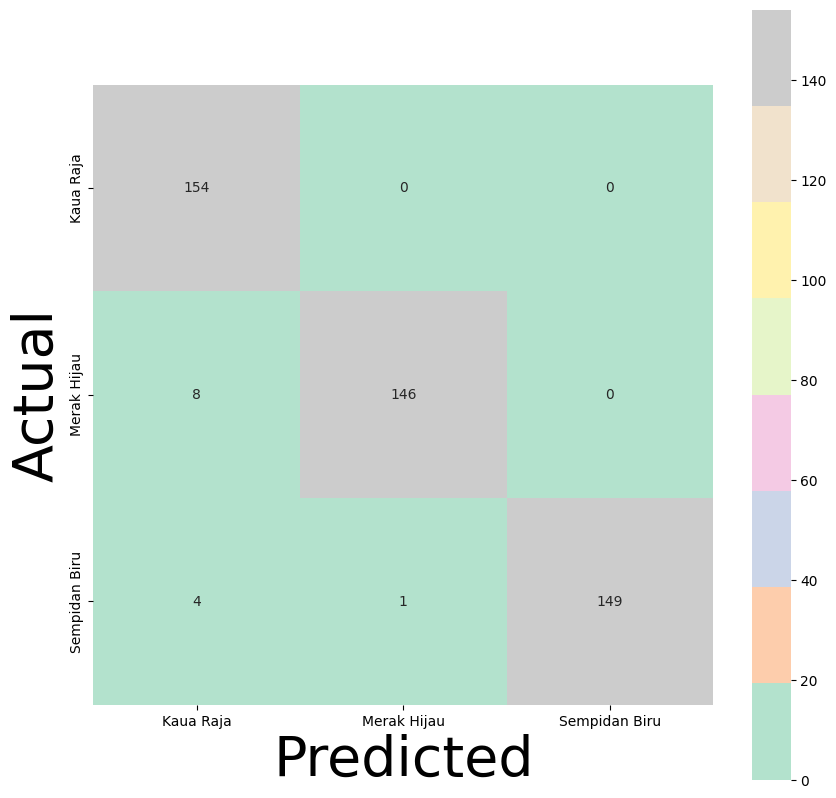

In [21]:
# Evaluasi model dengan confusion matrix
y_predict = mymodel.predict(x_testing)

y_predict_index = np.argmax(y_predict, axis = 1)
y_true_index = np.argmax(y_testing_categ, axis = 1)

cm = confusion_matrix(y_true_index, y_predict_index)
plt.figure(figsize = (10, 10))
ax = sns.heatmap(
    cm, 
    cmap = plt.cm.Pastel2, 
    annot = True, 
    square = True, 
    xticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    yticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    fmt = 'd' )
ax.set_ylabel('Actual', fontsize = 40)
ax.set_xlabel('Predicted', fontsize = 40)

## Code untuk lakukan test satuan

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np

# model yang sudah dilatih dan dimuat di atas 'mymodel'

# Memuat dan mempersiapkan citra
img_path = 'Testing Demo/114.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Melakukan prediksi
result_prediction = mymodel.predict(img_array)

1/1 [==============================] - 1s 985ms/step


In [34]:
predicted_class = np.argmax(result_prediction)
if predicted_class == 0:
    print(f"Hasil prediksi: {predicted_class} - Burung Kaua Raja")
if predicted_class == 1:
    print(f"Hasil prediksi: {predicted_class} - Burung Merak Hijau")
if predicted_class == 2:
    print(f"Hasil prediksi: {predicted_class} - Burung Sempidan Biru")
print(result_prediction)

Hasil prediksi: 0 - Burung Kaua Raja
[[1.0000000e+00 2.5028508e-31 6.2942242e-33]]


## Arsitektur ke2 menggunakan lapisan yang dibuat secara sederhana

In [9]:
# Arsitektur Coba-coba

model_built_from_scratch = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dropout(0.3, seed = 112),
    tf.keras.layers.Dense(500, activation = 'relu'),
    tf.keras.layers.Dropout(0.5, seed = 112),
    tf.keras.layers.Dense(3, activation = 'softmax'),
])

model_built_from_scratch.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [10]:
# Sesuaikan optimasi yang mau digunakan, loss menggunakan categorycal_crossentropy karena kelas yang dipelajari 3 
model_built_from_scratch.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

In [11]:
epochs = 20
btchSize = 100
model_save_path = ".\\trained_model\model4.hdf5"

train_datagen = ImageDataGenerator()

valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow(
    x_train, y_train, batch_size = btchSize)

validation_generator = valid_datagen.flow(
    x_valid, y_valid, batch_size = btchSize)

checkpointer = ModelCheckpoint(model_save_path, save_best_only = True, verbose = 1)

history2 = model_built_from_scratch.fit(
    train_generator,
    steps_per_epoch = len(x_train) // btchSize,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = len(x_valid) // btchSize,
    callbacks = [checkpointer])

np.save('.\\trained_model\historymodel4_save.npy', history2.history)

Epoch 1/20
14/14 [==============================] - ETA: 0s - loss: 6.4951 - accuracy: 0.3406
Epoch 1: val_loss improved from inf to 1.07247, saving model to .\trained_model\model4.hdf5


c:\Python\Python3.11.6\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 [==============================] - 89s 6s/step - loss: 6.4951 - accuracy: 0.3406 - val_loss: 1.0725 - val_accuracy: 0.5000
Epoch 2/20
14/14 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.4121
Epoch 2: val_loss improved from 1.07247 to 1.04919, saving model to .\trained_model\model4.hdf5
14/14 [==============================] - 89s 6s/step - loss: 1.0718 - accuracy: 0.4121 - val_loss: 1.0492 - val_accuracy: 0.4667
Epoch 3/20
14/14 [==============================] - ETA: 0s - loss: 0.9594 - accuracy: 0.5456
Epoch 3: val_loss improved from 1.04919 to 0.78913, saving model to .\trained_model\model4.hdf5
14/14 [==============================] - 78s 5s/step - loss: 0.9594 - accuracy: 0.5456 - val_loss: 0.7891 - val_accuracy: 0.6567
Epoch 4/20
14/14 [==============================] - ETA: 0s - loss: 0.8495 - accuracy: 0.6193
Epoch 4: val_loss did not improve from 0.78913
14/14 [==============================] - 73s 5s/step - loss: 0.8495 - accuracy: 0.6193 - val

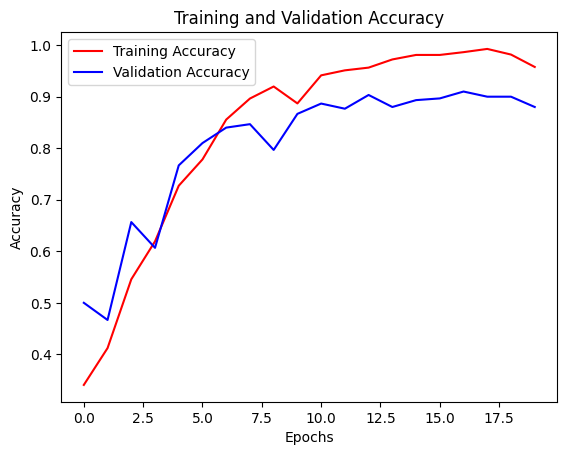

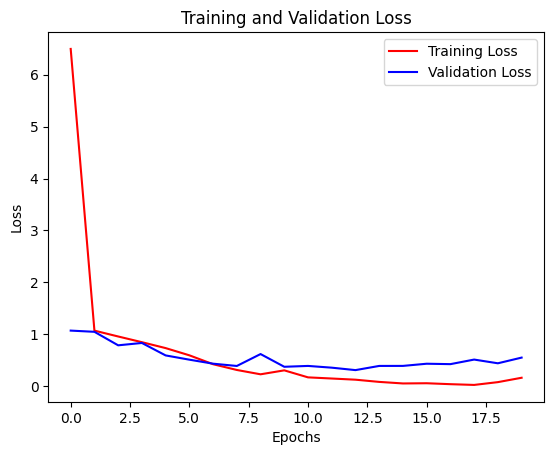

In [12]:
# Line Chart Perkembangan Akurasi & Loss Training Model

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

In [14]:
# Load model

# muat model agar dapat ditest
mymodel_path = '.\\trained_model\\model4\\model4.hdf5'
mymodelhistory_path = '.\\trained_model\\model4\\historymodel4_save.npy'

mymodel = load_model(mymodel_path)
history = np.load(mymodelhistory_path, allow_pickle = 'TRUE').item()

In [18]:
btchSize_test = 45

(eval_loss, eval_accuracy) = model_built_from_scratch.evaluate(
    x_testing, y_testing_categ, batch_size = btchSize_test, verbose = 1)

print(f"Accuracy : {eval_accuracy*100}%")
print(f"Loss : {eval_loss}")
print()
print(f"Jumlah data train : {len(x_train)+len(x_valid)}")
print(f"Jumlah data test : {len(x_testing)}")

11/11 [==============================] - 7s 650ms/step - loss: 0.2956 - accuracy: 0.8976
Accuracy : 89.76035118103027%
Loss : 0.2955803871154785

Jumlah data train : 1839
Jumlah data test : 459


15/15 [==============================] - 7s 471ms/step


Text(0.5, 155.72222222222217, 'Predicted')

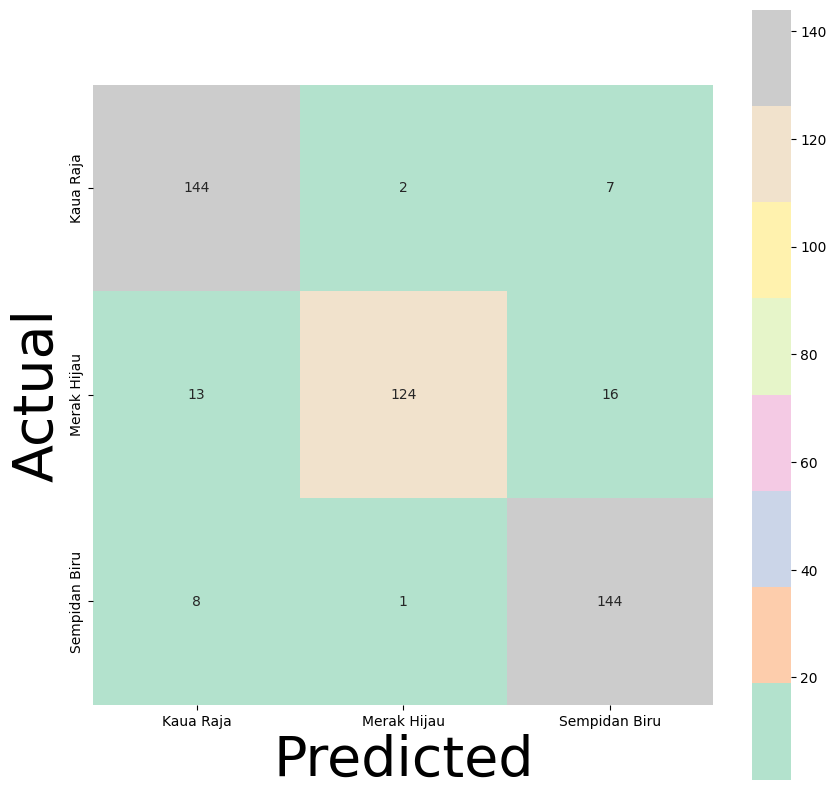

In [20]:
# Evaluasi model dengan confusion matrix
y_predict = model_built_from_scratch.predict(x_testing)

y_predict = np.argmax(y_predict, axis = 1)
y_true = np.argmax(y_testing_categ, axis = 1)

cm = confusion_matrix(y_true, y_predict)
plt.figure(figsize = (10, 10))
ax = sns.heatmap(
    cm, 
    cmap = plt.cm.Pastel2, 
    annot = True, 
    square = True, 
    xticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    yticklabels = ['Kaua Raja', 'Merak Hijau', 'Sempidan Biru'],
    fmt = 'd' )
ax.set_ylabel('Actual', fontsize = 40)
ax.set_xlabel('Predicted', fontsize = 40)